# 銷售分析

#### Import 必要的套件
- os
- pandas

In [1]:
# 要對檔案操作 import os
import os
import pandas as pd

#### 合併 data 到一個 CSV
- 方便進行年度分析
- 思路:
    - 先建立一個空的Dataframe， pd.DataFrame()
    - 再利用， .concat([空白df, 灌的內容]) 灌進去，空的Dataframe
        - 製作好的df，再製作.to_csv()
    - 若是字典，用append()灌進去

In [2]:
df = pd.read_csv('./sales/Sales_April_2019.csv')
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


指定的文件夹包含的文件或文件夹的名字的列表
- os.listdir('路徑')

In [3]:
# 當前目錄 ./
files = [file for file in os.listdir('./sales')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
month_data = pd.DataFrame()
files = [file for file in os.listdir('./sales')]
for file in files:
    df = pd.read_csv('./sales/' + file) 
    month_data = pd.concat([month_data, df])
    #print(file)
month_data
month_data.to_csv("all_data.csv", index=False)

#### 讀取 合併後的 dataframe

In [5]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Q1:哪一個月最賺錢?那個月賺多少錢?

### 清理 data!

##### Drop rows of NAN  及 排除多餘的字
- 找NAN
    - .isna().any(axis=1)
- 刪掉NAN
    - .dropna(how='all')
- 條件排除法
    - 設定條件，反向排除，灌入新的DF中
        - Step 1: condition = data['項目']>5 ; > , < , = , !=
        - Step 2: data_1 = data[設定好的條件]
        
            - contition = all_data['Order Date'].str[0:2] == 'Or'
            - temp_df = all_data[contition]

In [6]:
all_data.isna().any(axis=1)

0         False
1          True
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186850, dtype: bool

In [7]:
# 找 NAN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

# 殺 NA
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### 利用關鍵字，排除錯誤的值

In [8]:
# 找 關鍵字
contition = all_data['Order Date'].str[0:2] == 'Or'
temp_df = all_data[contition]
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### 反向邏輯排除關鍵字

In [9]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### 為了計算DF，要轉換DF的資料格式 type
- 轉換成數字型態(DF只有數字才能轉，有文字會出錯)
    - .to_numeric()

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [11]:
# 轉日期型態
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Q.加入 月份的列表?
- 才能知道哪一個月

In [12]:
# Order Date 的前兩個字就是月份
all_data['Month'] = all_data['Order Date'].str[0:2]

all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


Sales=Quantity Ordered*Price Each
- 運算前須將，資料轉成數字型態
    - .astype()
    - int /// float /// str

In [13]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data['Sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Sales, Length: 185950, dtype: float64

In [14]:
groupby_1 = all_data.groupby('Month').sum()
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,10903,1811768.38,9709,1822256.73
2,13449,2188884.72,23950,2202022.42
3,17005,2791207.83,45459,2807100.38
4,20558,3367671.02,73116,3390670.24
5,18667,3135125.13,82830,3152606.75
6,15253,2562025.61,81324,2577802.26
7,16072,2632539.56,100051,2647775.76
8,13448,2230345.42,95688,2244467.88
9,13109,2084992.09,104589,2097560.13


# Q.視覺化我的銷售
- matplotlib
    - 設定刻度
        - .xticks(months)

In [15]:
import matplotlib.pyplot as plt

一張長條圖bar，有
- X軸
    - 月份
- Y軸
    - 銷售額
- X標籤
- Y標籤

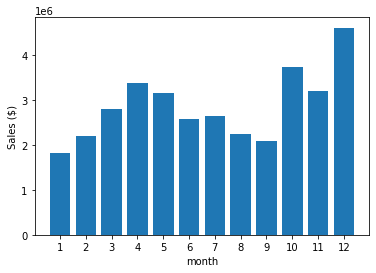

In [17]:
months = range(1, 13)  # 12月 - X軸 

plt.bar(months, groupby_1['Sales'])
plt.xticks(months)

plt.xlabel('month')
plt.ylabel('Sales ($)')
plt.show()

# Q.哪個城市的銷售額最高?
- 加入城市欄位
    - 城市的資料在，Purchase Address，的第一個逗號後面
        - [1]位置
- 在DF上處裡函數
    - .apply()
        - lambda X: X要做的事情

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99


切片方法，
- 在想要的地方劃一刀
    - .split(',')[索引號]

In [21]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['City'].head()

0          Dallas
2          Boston
3     Los Angeles
4     Los Angeles
5     Los Angeles
Name: City, dtype: object

In [ ]:
all_data.head()

In [22]:
# 進階切法
#all_data_9 = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(",")[2].split(" ")[1])
all_data['City'] = all_data['Purchase Address'].apply(lambda x: '{} ({})'.format( x.split(',')[1], x.split(",")[2].split(" ")[1]))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)


In [23]:
all_data.groupby('City').sum()

,Quantity Ordered,Price Each,Month 2,Month,Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,104794,2795498.58
Austin (TX),11153,1809873.61,69829,69829,1819581.75
Boston (MA),22528,3637409.77,141112,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,208325,5452570.80
New York City (NY),27932,4635370.83,175741,175741,4664317.43
Portland (ME),2750,447189.25,17144,17144,449758.27
Portland (OR),11303,1860558.22,70621,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,315520,8262203.91


In [24]:
groupby_2 = all_data.groupby('City').sum()

圖表上的城市是唯一的
- 取出不重複的值
     - .unique()
- 重設，標籤格式
    - .ticklabel_format()

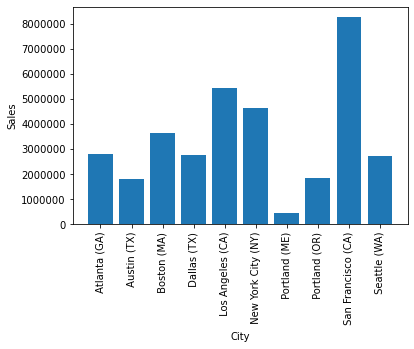

In [25]:
# x = all_data['City'].unique()
keys = [city for city, df in all_data.groupby(['City'])] 
y = groupby_2['Sales']

plt.bar(keys, y)
plt.xticks(rotation = 'vertical')
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.xlabel('City')
plt.ylabel('Sales')

plt.show()

In [26]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)


## Data 探索!

# Q 1: 銷售最好的月份?? 可賺多少? 

In [27]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [28]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,10903,1811768.38,9709,1822256.73
2,13449,2188884.72,23950,2202022.42
3,17005,2791207.83,45459,2807100.38
4,20558,3367671.02,73116,3390670.24
5,18667,3135125.13,82830,3152606.75
6,15253,2562025.61,81324,2577802.26
7,16072,2632539.56,100051,2647775.76
8,13448,2230345.42,95688,2244467.88
9,13109,2084992.09,104589,2097560.13


range(1, 13)


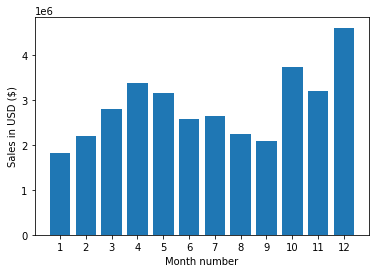

In [29]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



# Q 2: 哪個城市賣最多?

In [30]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month 2,Month,Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,104794,2795498.58
Austin (TX),11153,1809873.61,69829,69829,1819581.75
Boston (MA),22528,3637409.77,141112,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,208325,5452570.80
New York City (NY),27932,4635370.83,175741,175741,4664317.43
Portland (ME),2750,447189.25,17144,17144,449758.27
Portland (OR),11303,1860558.22,70621,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,315520,8262203.91


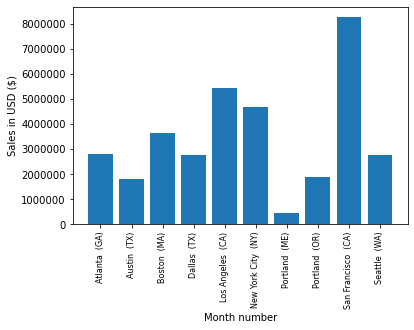

In [31]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]  #轉至到新的表

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.ticklabel_format(axis = 'y', style = 'plain')
plt.show()

# Q 3: 甚麼時候，我們給予廣告，可能可吸引更多消費者?
- 需要時間的欄位
    - 時間的資料在Order Date
        - 為了避免發生格是錯誤，直接使用，取時間的函數 pd.to_datetime(  )
            - pd.to_datetime(  ).dt.hour
            - pd.to_datetime(  ).dt.minute

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)


In [ ]:
#all_data['tst'] = pd.to_datetime(all_data['Order Date'])

all_data = all_data.drop(columns=['tst'])
all_data.head()

In [34]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA)


In [35]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
#all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),9,27


### 跟時間有關，建議用，折線圖表示
- plt.plot()
- 分析時間幾次
    - 資料.groupby().count()
- 網格輔助線
    - plt.grid()

In [36]:
keys_hour = [hour for hour, df in all_data.groupby(['Hour'])]
keys_minute = [minute for minute, df in all_data.groupby(['Minute'])]

In [37]:
goupeby_3 = all_data.groupby(['Hour']).count()
goupeby_3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month,Sales,City,Minute
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854


In [38]:
import matplotlib.pyplot as plt

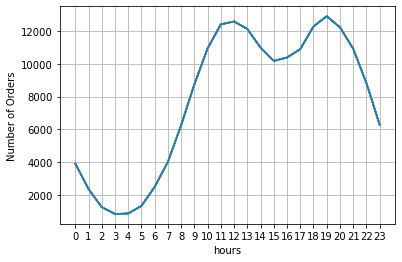

In [39]:
plt.plot(keys_hour, goupeby_3)

plt.xlabel('hours')
plt.ylabel('Number of Orders')
plt.xticks(keys_hour)
plt.grid()
plt.show()

In [ ]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

# Q 4: 甚麼產品最常同時出售?
- 篩選，相同的訂單ID出售的產品 
    - .duplicated(keep=False)
        - 為False，則將所有相同的值視為重複項
    - 產生，因為函數 產生不同數值，但 X*y相同大小的DataFrame，用法同.apply()
        - .transform(函數或陣列或字典)
        - .transform(lambda x: )

In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),9,27


In [42]:
condition_2 = all_data['Order ID'].duplicated(keep=False)
all_data[condition_2].head()
df = all_data[condition_2]

In [43]:
# 選定的索引，用逗號 join 起來
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df.head()

C:\Users\user\AppData\Local\Temp/ipykernel_11196/3774156159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


發現重複項，進行刪除
- .drop_duplicates()

In [44]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


### 計數專用的，數據庫
- counter ，主要方便用來計數，key 是要計數的 item，value 保存的是個數
    - from itertools import combinations
    - from collections import Counter
        - .most_common()  # 所有數字按照頻率排序

In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
count = Counter()

for i in df['Grouped']:
    i_list = i.split(',')
    count.update(Counter(combinations(i_list, 2))) # 2就是兩兩一組
for key, value in count.most_common(10):
    print(key, value)

In [ ]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates() 

In [ ]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


# Q 5:甚麼產品賣最好?

In [45]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month 2,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,4,11.99,Los Angeles (CA),9,27


In [46]:
product_group = all_data.groupby('Product')

In [47]:
Quantity_Ordered = product_group.sum()['Quantity Ordered']
Quantity_Ordered.head()

Product
20in Monitor               4129
27in 4K Gaming Monitor     6244
27in FHD Monitor           7550
34in Ultrawide Monitor     6199
AA Batteries (4-pack)     27635
Name: Quantity Ordered, dtype: int64

In [48]:
import matplotlib.pyplot as plt

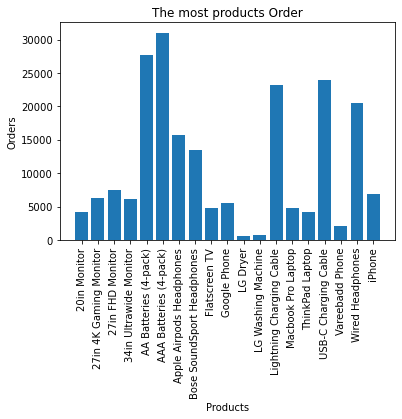

In [49]:
# 置換成 groupby的數據 資料才能正確
products = [product for product, df in product_group]

x = products
y1 = Quantity_Ordered
plt.bar(x, y1)

plt.title('The most products Order')
plt.xlabel('Products')
plt.ylabel('Orders')
plt.xticks(rotation= 90)
#plt.grid()
plt.show()

### 加入第二個Y軸，共用x軸
- 價格，以折現圖方式呈現
    - 利用，子圖，fig, x1 = plt.subplots() 、共用x軸 .twinx()
        - fig, x1 = plt.subplots()   # 透過指定 figure 和 axes 來進行畫圖
        - x2 = x1.twinx()
        
        - x1.plot(x, y1)
        - x2.plot(x, y2)

        - x1.set_xlabel('X data')
        - x1.set_ylabel('y1 data')
        - x2.set_ylabel('y2 data')

In [50]:
prices = all_data.groupby('Product').mean()['Price Each']
prices.head()

Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

C:\Users\user\AppData\Local\Temp/ipykernel_11196/1461846289.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  x1.set_xticklabels(x, rotation= 90)


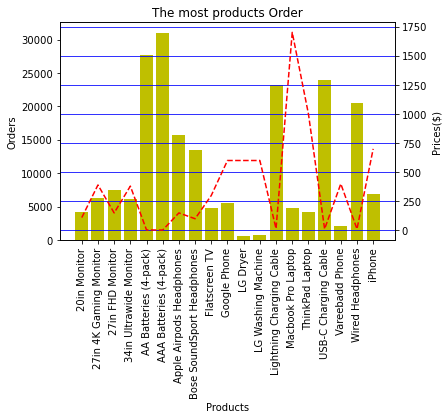

In [51]:
x = products
y1 = Quantity_Ordered
y2 = prices

fig, x1 = plt.subplots()
x2 = x1.twinx()

x1.bar(x, y1, color='y')
x2.plot(x, y2, 'r--')

plt.title('The most products Order')
x1.set_xlabel('Products')
x1.set_ylabel('Orders')
x2.set_ylabel('Prices($)')

x1.set_xticklabels(x, rotation= 90)
plt.grid(color='blue')
plt.show()